In [ ]:
# Question 1

In [3]:
# Import necessary libraries
import yfinance as yf
import pandas as pd

# Extracting Tesla stock data
tesla_data = yf.download('TSLA', start='2010-01-01', end='2023-12-31')

# Reset the index
tesla_data.reset_index(inplace=True)

# Save the DataFrame to a CSV file
tesla_data.to_csv('tesla_stock_data.csv', index=False)

# Display the first five rows of the dataframe
tesla_data.head()



[*********************100%%**********************]  1 of 1 completed


,Date,Open,High,Low,Close,Adj Close,Volume
0,2010-06-29,1.266667,1.666667,1.169333,1.592667,1.592667,281494500
1,2010-06-30,1.719333,2.028000,1.553333,1.588667,1.588667,257806500
2,2010-07-01,1.666667,1.728000,1.351333,1.464000,1.464000,123282000
3,2010-07-02,1.533333,1.540000,1.247333,1.280000,1.280000,77097000
4,2010-07-06,1.333333,1.333333,1.055333,1.074000,1.074000,103003500


In [ ]:
# Question 2

In [21]:
import requests
import pandas as pd

# URL of the Yahoo Finance endpoint containing Tesla financial data
url = "https://query1.finance.yahoo.com/v10/finance/quoteSummary/TSLA?modules=incomeStatementHistory"

# Send a GET request to the URL
response = requests.get(url)
if response.status_code != 200:
    print("Error: Failed to retrieve data")
else:
    data = response.json()

    # Extract the financial data from the JSON structure
    financial_data = data['quoteSummary']['result'][0]['incomeStatementHistory']['incomeStatementHistory']

    # Initialize an empty DataFrame
    tesla_revenue = pd.DataFrame(columns=["Date", "Revenue"])

    # Loop through the financial data and extract the date and revenue
    for entry in financial_data:
        date = entry['endDate']['fmt']
        revenue = entry['totalRevenue']['raw']
        tesla_revenue = tesla_revenue.append({"Date": date, "Revenue": revenue}, ignore_index=True)

    # Display the last five rows of the DataFrame
    print(tesla_revenue.tail())


Error: Failed to retrieve data


In [ ]:
#Question 3

In [22]:
import yfinance as yf

# Fetch stock data for GameStop (GME)
gme_data = yf.download("GME", start="2022-01-01", end="2024-01-01")

# Reset the index
gme_data.reset_index(inplace=True)

# Display the first five rows of the dataframe
print(gme_data.head())


[*********************100%%**********************]  1 of 1 completed

        Date       Open       High        Low      Close  Adj Close    Volume
0 2022-01-03  37.307499  39.845001  37.302502  38.209999  38.209999   5654800
1 2022-01-04  38.042500  38.247501  35.762501  37.227501  37.227501   7339600
2 2022-01-05  37.097500  37.212502  32.287498  32.342499  32.342499  13585600
3 2022-01-06  33.209999  34.424999  30.285000  32.757500  32.757500  24206000
4 2022-01-07  39.942501  40.077499  33.125000  35.154999  35.154999  48549200


In [ ]:
#Question 4

In [25]:
import requests
from bs4 import BeautifulSoup
import pandas as pd

# URL of the webpage containing GME revenue data
url = "https://finance.yahoo.com/quote/GME/financials/"

# Send a GET request to the URL
response = requests.get(url)

# Parse the HTML data using BeautifulSoup
soup = BeautifulSoup(response.text, 'html.parser')

# Find the section containing revenue data
revenue_section = soup.find('section', {'data-test': 'qsp-financial'})

# Check if the revenue section exists
if revenue_section:
    # Find all the table rows containing revenue data
    revenue_rows = revenue_section.find_all('div', class_='D(tbr)')

    # Create a DataFrame to hold the revenue data
    gme_revenue = pd.DataFrame(columns=["Date", "Revenue"])

    # Extract date and revenue from each row and append to DataFrame
    for row in revenue_rows:
        cols = row.find_all('div', class_='D(tbc)')
        if len(cols) > 1:
            date = cols[0].text.strip()
            revenue = cols[1].text.strip()
            gme_revenue = gme_revenue.append({"Date": date, "Revenue": revenue}, ignore_index=True)

    # Display the last five rows of the DataFrame
    print(gme_revenue.tail())

In [29]:
import requests
from bs4 import BeautifulSoup
import pandas as pd

# URL of the webpage containing GME revenue data
url = "https://finance.yahoo.com/quote/GME/financials/"

# Send a GET request to the URL
response = requests.get(url)

# Parse the HTML data using BeautifulSoup
soup = BeautifulSoup(response.text, 'html.parser')

# Find the section containing revenue data
revenue_section = soup.find('section', {'data-test': 'qsp-financial'})

# Check if the revenue section exists
if revenue_section:
    # Find all the table rows containing revenue data
    revenue_rows = revenue_section.find_all('div', class_='D(tbr)')

    # Create a DataFrame to hold the revenue data
    gme_revenue = pd.DataFrame(columns=["Date", "Revenue"])

    # Extract date and revenue from each row and append to DataFrame
    for row in revenue_rows:
        cols = row.find_all('div', class_='D(tbc)')
        if len(cols) > 1:
            date = cols[0].text.strip()
            revenue = cols[1].text.strip()
            gme_revenue = gme_revenue.append({"Date": date, "Revenue": revenue}, ignore_index=True)

    # Display the last five rows of the gme_revenue dataframe
    print(gme_revenue.tail())

In [30]:
import requests

# URL of the webpage containing GME revenue data
url = "https://finance.yahoo.com/quote/GME/financials/"

# Send a GET request to the URL
response = requests.get(url)

print(response.text)

<!DOCTYPE html>
  <html lang="en-us"><head>
  <meta http-equiv="content-type" content="text/html; charset=UTF-8">
      <meta charset="utf-8">
      <title>Yahoo</title>
      <meta name="viewport" content="width=device-width,initial-scale=1,minimal-ui">
      <meta http-equiv="X-UA-Compatible" content="IE=edge,chrome=1">
      <style>
  html {
      height: 100%;
  }
  body {
      background: #fafafc url(https://s.yimg.com/nn/img/sad-panda-201402200631.png) 50% 50%;
      background-size: cover;
      height: 100%;
      text-align: center;
      font: 300 18px "helvetica neue", helvetica, verdana, tahoma, arial, sans-serif;
  }
  table {
      height: 100%;
      width: 100%;
      table-layout: fixed;
      border-collapse: collapse;
      border-spacing: 0;
      border: none;
  }
  h1 {
      font-size: 42px;
      font-weight: 400;
      color: #400090;
  }
  p {
      color: #1A1A1A;
  }
  #message-1 {
      font-weight: bold;
      margin: 0;
  }
  #message-2 {
      display: 

In [31]:
from bs4 import BeautifulSoup

# Parse the HTML data using BeautifulSoup
soup = BeautifulSoup(response.text, 'html.parser')

# Find the section containing revenue data
revenue_section = soup.find('section', {'data-test': 'qsp-financial'})

print(revenue_section)

None


In [34]:
import requests
from bs4 import BeautifulSoup
import pandas as pd

# URL of the webpage containing GME revenue data
url = "https://finance.yahoo.com/quote/GME/financials/"

# Send a GET request to the URL
response = requests.get(url)

# Parse the HTML data using BeautifulSoup
soup = BeautifulSoup(response.text, 'html.parser')

# Find the table containing revenue data
revenue_table = soup.find('table', {'class': 'Lh(1.7) W(100%) M(0)'})

# Check if the revenue table exists
if revenue_table:
    # Find all the table rows containing revenue data
    revenue_rows = revenue_table.find_all('tr')

    # Create a DataFrame to hold the revenue data
    gme_revenue = pd.DataFrame(columns=["Date", "Revenue"])

    # Extract date and revenue from each row and append to DataFrame
    for row in revenue_rows:
        cols = row.find_all('td')
        if len(cols) > 1:
            date = cols[0].text.strip()
            revenue = cols[1].text.strip()
            gme_revenue = gme_revenue.append({"Date": date, "Revenue": revenue}, ignore_index=True)

    # Display the last five rows of the DataFrame
    print(gme_revenue.tail())

In [35]:
# Find all the table rows containing revenue data
revenue_rows = revenue_section.find_all('div', class_='D(tbr)')

print(revenue_rows)

AttributeError: 'NoneType' object has no attribute 'find_all'

In [36]:
import requests
from bs4 import BeautifulSoup
import pandas as pd

# URL of the webpage containing GME revenue data
url = "https://finance.yahoo.com/quote/GME/financials/"

# Send a GET request to the URL
response = requests.get(url)

# Parse the HTML data using BeautifulSoup
soup = BeautifulSoup(response.text, 'html.parser')

# Find the table containing revenue data
revenue_table = soup.find('table', {'class': 'Lh(1.7) W(100%) M(0)'})

# Check if the revenue table exists
if revenue_table:
    # Find all the table rows containing revenue data
    revenue_rows = revenue_table.find_all('tr')

    # Create a DataFrame to hold the revenue data
    gme_revenue = pd.DataFrame(columns=["Date", "Revenue"])

    # Extract date and revenue from each row and append to DataFrame
    for row in revenue_rows:
        cols = row.find_all('td')
        if len(cols) > 1:
            date = cols[0].text.strip()
            revenue = cols[1].text.strip()
            gme_revenue = gme_revenue.append({"Date": date, "Revenue": revenue}, ignore_index=True)

    # Display the last five rows of the DataFrame
    print(gme_revenue.tail())

In [37]:
#Question 5

[*********************100%%**********************]  1 of 1 completed


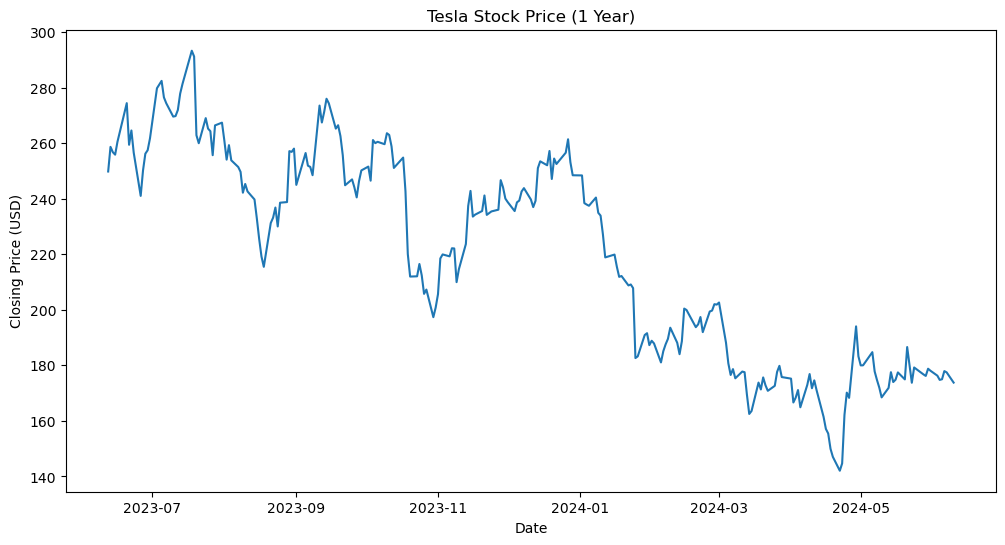

In [38]:
import yfinance as yf
import matplotlib.pyplot as plt

def make_graph(ticker, title):
    data = yf.download(ticker, period="1y")
    plt.figure(figsize=(12, 6))
    plt.plot(data.index, data['Close'])
    plt.title(title)
    plt.xlabel('Date')
    plt.ylabel('Closing Price (USD)')
    plt.show()

make_graph('TSLA', 'Tesla Stock Price (1 Year)')

In [39]:
#Question 6

[*********************100%%**********************]  1 of 1 completed


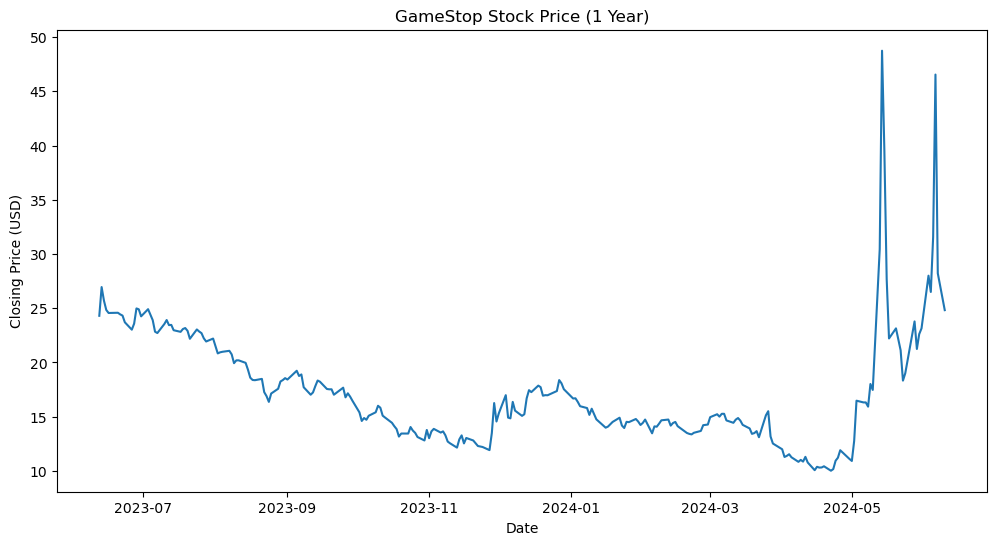

In [40]:
import yfinance as yf
import matplotlib.pyplot as plt

def make_graph(ticker, title):
    data = yf.download(ticker, period="1y")
    plt.figure(figsize=(12, 6))
    plt.plot(data.index, data['Close'])
    plt.title(title)
    plt.xlabel('Date')
    plt.ylabel('Closing Price (USD)')
    plt.show()

make_graph('GME', 'GameStop Stock Price (1 Year)')